<a href="https://colab.research.google.com/github/marcelogarret/reconpad/blob/main/aula3a_multiclasse_garret.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [211]:
from sklearn.datasets import load_wine
dataset = load_wine()
X, y = dataset.data, dataset.target
X.shape, y.shape

((178, 13), (178,))

In [212]:
set(y)

{0, 1, 2}

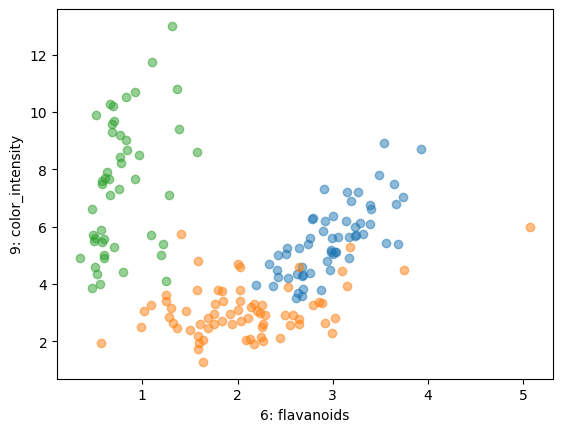

In [213]:
import matplotlib.pyplot as plt
i, j = 6, 9
plt.xlabel(f"{i}: {dataset.feature_names[i]}")
plt.ylabel(f"{j}: {dataset.feature_names[j]}")
for k in set(y):
  plt.plot(X[:,i][y==k], X[:,j][y==k], "o", alpha=0.5)
plt.show()

In [214]:
import numpy as np
from sklearn.base import BaseEstimator, ClassifierMixin
class knn(BaseEstimator, ClassifierMixin):
  def fit(self, X, y):
    self.X = X
    self.y = y
  def distancia(self, x):
    diferenca = self.X - x
    quadrado = diferenca**2
    soma = np.sum(quadrado, axis=1)
    raiz = np.sqrt(soma)
    return raiz
  def predict(self, X):
    ypred = np.empty((X.shape[0],))
    for i in range(X.shape[0]):
      distancias = self.distancia(X[i])
      vizinho = np.argmin((distancias))
      ypred[i] = self.y[vizinho]
    return ypred


In [215]:
from sklearn.metrics import accuracy_score
modelo = knn()
modelo.fit(X, y)
accuracy_score(y, modelo.predict(X))

1.0

In [216]:
from sklearn.model_selection import cross_validate
cross_validate(knn(), X, y)

{'fit_time': array([1.26838684e-04, 4.91857529e-04, 1.02996826e-04, 6.46114349e-05,
        5.91278076e-05]),
 'score_time': array([0.00382233, 0.0025146 , 0.00200891, 0.00141239, 0.00139952]),
 'test_score': array([0.80555556, 0.63888889, 0.66666667, 0.68571429, 0.82857143])}

In [217]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

Xtr, Xte, ytr, yte = train_test_split(X, y, test_size=0.3)
modelo = knn()
modelo.fit(Xtr, ytr)
ypred = modelo.predict(Xte)
confusion_matrix(yte, ypred)

array([[14,  0,  0],
       [ 1, 19,  5],
       [ 1,  6,  8]])

In [218]:
from sklearn.metrics import f1_score
f1_score(yte, ypred, average="macro")

0.754920634920635

In [219]:
sum(y==0), sum(y==1), sum(y==2)

(59, 71, 48)

In [220]:
cross_validate(knn(), X, y, scoring="f1_macro")

{'fit_time': array([9.56058502e-05, 7.11441040e-04, 1.16586685e-04, 1.06096268e-04,
        9.39369202e-05]),
 'score_time': array([0.00680041, 0.00376081, 0.00449467, 0.00527477, 0.00342369]),
 'test_score': array([0.80371184, 0.63163031, 0.65010893, 0.67301587, 0.80277778])}

In [221]:
cross_validate(knn(), X, y, scoring=['precision_macro', 'recall_macro'])

{'fit_time': array([1.14440918e-04, 1.22785568e-04, 1.02519989e-04, 1.12533569e-04,
        7.34329224e-05]),
 'score_time': array([0.00591302, 0.00488091, 0.00557351, 0.00347137, 0.00344157]),
 'test_precision_macro': array([0.8022533 , 0.64814815, 0.7       , 0.74603175, 0.80903541]),
 'test_recall_macro': array([0.81031746, 0.64444444, 0.64126984, 0.65608466, 0.80740741])}

In [222]:
from sklearn.model_selection import RepeatedStratifiedKFold
cross_validate(knn(), X, y, scoring=['accuracy', 'precision_macro', 'recall_macro', 'f1_macro'],
               cv=RepeatedStratifiedKFold())

{'fit_time': array([1.17540359e-04, 8.86917114e-05, 1.23262405e-04, 7.12871552e-05,
        9.32216644e-05, 6.60419464e-05, 9.20295715e-05, 6.79492950e-05,
        6.60419464e-05, 6.58035278e-05, 6.17504120e-05, 6.22272491e-05,
        9.34600830e-05, 1.03473663e-04, 1.25646591e-04, 8.27312469e-05,
        6.53266907e-05, 6.43730164e-05, 6.65187836e-05, 8.74996185e-05,
        6.79492950e-05, 7.72476196e-05, 6.91413879e-05, 7.43865967e-05,
        8.22544098e-05, 6.69956207e-05, 7.31945038e-05, 6.93798065e-05,
        6.41345978e-05, 6.53266907e-05, 6.31809235e-05, 6.12735748e-05,
        1.00374222e-04, 6.74724579e-05, 7.29560852e-05, 6.10351562e-05,
        6.22272491e-05, 7.74860382e-05, 6.24656677e-05, 6.34193420e-05,
        7.67707825e-05, 6.58035278e-05, 6.15119934e-05, 6.77108765e-05,
        6.48498535e-05, 7.20024109e-05, 6.55651093e-05, 7.65323639e-05,
        6.50882721e-05, 8.08238983e-05]),
 'score_time': array([0.01001191, 0.00492644, 0.00485206, 0.00470591, 0.00534678,


In [223]:
from sklearn.linear_model import Perceptron
modelos = cross_validate(Perceptron(), X, y,
                        cv=RepeatedStratifiedKFold(random_state=42),
                        return_estimator=True)
modelos['test_score']

array([0.58333333, 0.58333333, 0.61111111, 0.57142857, 0.28571429,
       0.55555556, 0.58333333, 0.66666667, 0.51428571, 0.45714286,
       0.75      , 0.38888889, 0.58333333, 0.68571429, 0.42857143,
       0.52777778, 0.55555556, 0.61111111, 0.54285714, 0.74285714,
       0.41666667, 0.5       , 0.63888889, 0.54285714, 0.4       ,
       0.47222222, 0.47222222, 0.61111111, 0.62857143, 0.62857143,
       0.63888889, 0.44444444, 0.55555556, 0.57142857, 0.71428571,
       0.72222222, 0.63888889, 0.63888889, 0.51428571, 0.71428571,
       0.63888889, 0.72222222, 0.55555556, 0.62857143, 0.51428571,
       0.66666667, 0.41666667, 0.61111111, 0.71428571, 0.48571429])

In [224]:
sum(modelos['test_score'])/50

0.572936507936508

In [225]:
modelo = modelos['estimator'][10]
modelos['test_score'][10]

0.75

In [226]:
modelo.intercept_

array([-148.,   88.,   26.])

In [227]:
modelo.coef_[:,[6,9]]

array([[ 250.25    , -753.359999],
       [ 326.14    , -632.879996],
       [-343.8     ,  905.339994]])

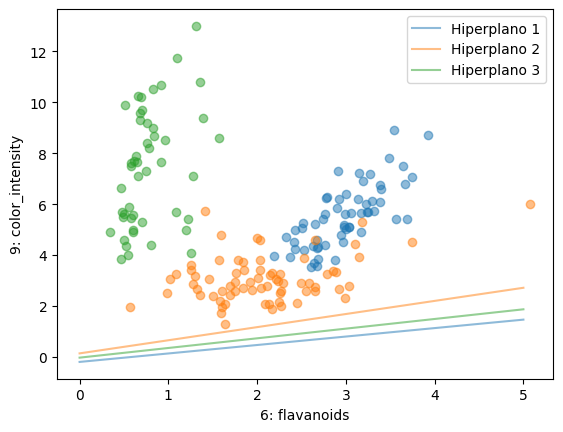

In [228]:
## !!!SOLUÇÃO 1!!!
## Solução para o classificador linear considerando todas as características e sem normalização do dataset
i, j = 6, 9
plt.xlabel(f"{i}: {dataset.feature_names[i]}")
plt.ylabel(f"{j}: {dataset.feature_names[j]}")
for k in set(y):
  plt.scatter(X[:,i][y==k], X[:,j][y==k], alpha=0.5)
  w = modelo.coef_[:,[i,j]][k] ## Selecionando os pesos definidos no modelo
  a = -w[0] / w[1] ## Definindo o coeficiente angular da reta que representa o hiperplano no gráfico 2D
  xx = np.linspace(0, 5) ## Gerando valores do eixo x dentro dos limites de 0 a 5
  yy = a * xx - (modelo.intercept_[k]) / w[1] ## Estimando os valores do eixo y para representação do hiperplano no gráfico 2D
  plt.plot(xx, yy, label=f'Hiperplano {k+1}', alpha=0.5) ## Plotando os hiperplanos

plt.legend()
plt.show()

0.8489682539682538


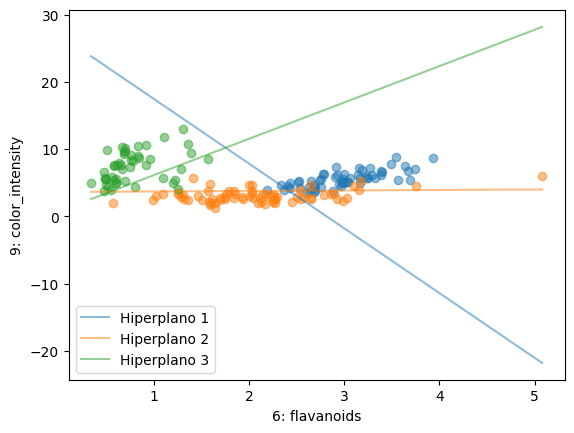

In [229]:
## !!!SOLUÇÃO 2!!!
## Solução para o classificador linear considerando o dataset reduzido para apenas 2 características
from sklearn.datasets import load_wine
from sklearn.linear_model import Perceptron
from sklearn.model_selection import cross_validate, RepeatedStratifiedKFold
import matplotlib.pyplot as plt
import numpy as np

# Carregar o conjunto de dados
i, j = 6, 9
X2, y2 = dataset.data[:, [i,j]], dataset.target

# Executar validação cruzada
modelos2 = cross_validate(Perceptron(), X2, y2,
                        cv=RepeatedStratifiedKFold(random_state=42),
                        return_estimator=True)

# Visualizar score médio dos modelos
print(sum(modelos2['test_score'])/50)

# Pegar o primeiro modelo treinado
modelo2 = modelos2['estimator'][0]

# Definindo valores máximos e mínimos do eixo X do gráfico
xmin, xmax = min(X2[:,0]), max(X2[:,0])

# Plotar os pontos e hiperplanos
plt.xlabel(f"{i}: {dataset.feature_names[i]}")
plt.ylabel(f"{j}: {dataset.feature_names[j]}")
for k in set(y):
    plt.scatter(X2[:,0][y==k], X2[:,1][y==k], alpha=0.5)
    w = modelo2.coef_[k] ## Selecionando os pesos definidos no modelo
    a = -w[0] / w[1] ## Definindo o coeficiente angular da reta que representa o hiperplano no gráfico 2D
    xx = np.linspace(xmin, xmax) ## Gerando valores do eixo x dentro dos limites de 0 a 5
    yy = a * xx - (modelo2.intercept_[k]) / w[1] ## Estimando os valores do eixo y para representação do hiperplano no gráfico 2D
    plt.plot(xx, yy, label=f'Hiperplano {k+1}', alpha=0.5) ## Plotando os hiperplanos

plt.legend()
plt.show()


0.9792539682539677


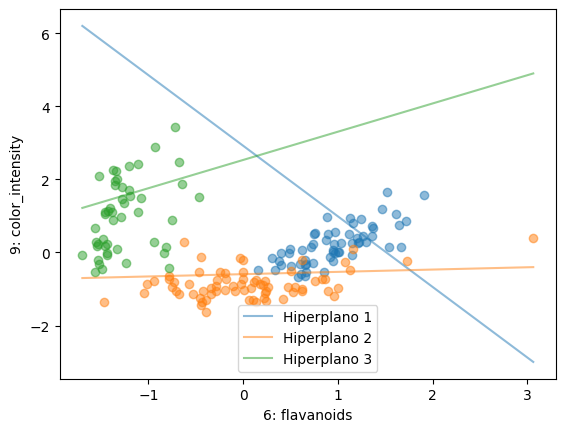

In [230]:
## !!!SOLUÇÃO 3!!!
## Solução para o classificador linear considerando todas as características e com normalização do dataset
from sklearn.datasets import load_wine
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate, RepeatedStratifiedKFold
import matplotlib.pyplot as plt
import numpy as np

# Carregar o conjunto de dados
i, j = 6, 9
dataset = load_wine()
X, y = dataset.data, dataset.target

# Normalizando dataset
Xnorm = StandardScaler().fit_transform(X)

# Executar validação cruzada
modelos3 = cross_validate(SGDClassifier(), Xnorm, y,
                        cv=RepeatedStratifiedKFold(random_state=42),
                        return_estimator=True)

# Visualizar score médio dos modelos
print(sum(modelos3['test_score'])/50)

# Pegar o primeiro modelo treinado
modelo3 = modelos3['estimator'][0]

# Definindo valores máximos e mínimos do eixo X do gráfico
xmin, xmax = min(Xnorm[:,i]), max(Xnorm[:,i])

# Plotar os pontos e hiperplanos
plt.xlabel(f"{i}: {dataset.feature_names[i]}")
plt.ylabel(f"{j}: {dataset.feature_names[j]}")
for k in set(y):
    plt.scatter(Xnorm[:,i][y==k], Xnorm[:,j][y==k], alpha=0.5)
    w = modelo3.coef_[:,[i,j]][k]
    a = -w[0] / w[1]
    xx = np.linspace(xmin, xmax)
    yy = a * xx - (modelo3.intercept_[k]) / w[1]
    plt.plot(xx, yy, label=f'Hiperplano {k+1}', alpha=0.5)

plt.legend()
plt.show()